In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from PointTracking import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

Total Imag Time:  1.3691492080688477
kmax:  4.0212385965949355
T:  4.042589962686201
(41, 128, 128)
(1, 128, 128)


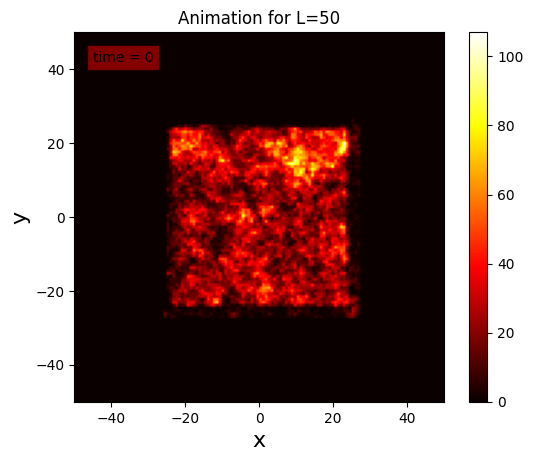

In [2]:
# TODO: Consider outputting a psi wavefunction and just inputting that each time to test - both for consistency between runs and also for more speed here 
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 10000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 1/2, dst = False, vortex = True)

In [3]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt) # initialize tracker object to track the vortices in each frame of snaps 

In [4]:
pt.labelVortices(tracker) # look into this error tomorrow - how many times has the loop gone through for this print out? once? 

In [7]:
L  = g.L 
dx = g.dx 

In [5]:
# start time to index: 
for i in range(len(tracker.points)): 
    print("Start Index: ", tracker.points[i].getStartTime()/(250*tracker.dt))
    print("Vortex Type: ", tracker.points[i].getVortexType())
    print('')

Start Index:  0.0
Vortex Type:  False

Start Index:  0.0
Vortex Type:  False



In [7]:
# # TODO: figure out how to automate plotting when the simulation to account for the appearing vortices 

# s = 124
# print(np.shape(tracker.points))
# v1_traj = tracker.points[0].getTrajectory()
# v2_traj = tracker.points[1].getTrajectory()
# # print(v1_traj[200])
# # print(v2_traj[200])  
# v3_traj = tracker.points[2].getTrajectory()
# v4_traj = tracker.points[3].getTrajectory()
# box = g.snaps[s][int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
# plt.figure() 
# plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
# plt.colorbar() 
# plt.scatter(v1_traj[s][0]-L/2,v1_traj[s][1]-L/2, color = 'blue', alpha = 0.7)
# plt.scatter(v2_traj[s][0]-L/2,v2_traj[s][1]-L/2, color = 'green', alpha = 0.7)
# # plt.scatter(17.578125-L/2, 21.484375-L/2, color = 'purple', alpha = 0.2)
# # plt.scatter(16.796875-L/2,21.484375-L/2, color = 'white', alpha = 0.2)
# plt.scatter(v3_traj[0][0]-L/2,v3_traj[0][1]-L/2, color = 'purple', alpha = 0.7)
# plt.scatter(v4_traj[0][0]-L/2,v4_traj[0][1]-L/2, color = 'white', alpha = 0.7)
# # plt.xlim(-12,12)
# # plt.ylim(-12,12)
# plt.xlabel('y')
# plt.ylabel('x')

# plt.show() 

(2,)
0
(25.390625, 25.390625)
1
(27.734375, 26.953125)


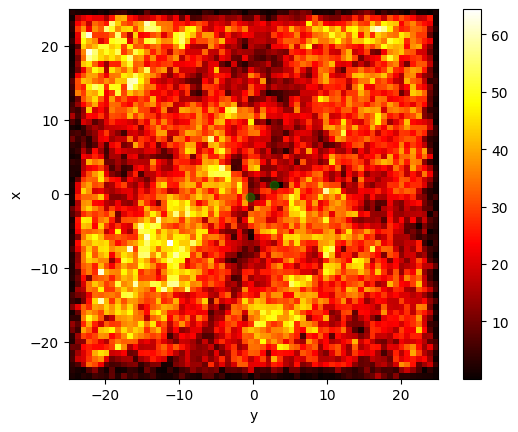

In [8]:
s = 22
print(np.shape(tracker.points))
# v1_traj = tracker.points[0].getTrajectory()
# v2_traj = tracker.points[1].getTrajectory()
# print(v1_traj[200])
# print(v2_traj[200])  
vi_traj = [] 
for i in range(len(tracker.points)): 
    vi_traj.append(tracker.points[i].getTrajectory())
# v3_traj = tracker.points[2].getTrajectory()
# v4_traj = tracker.points[3].getTrajectory()
box = g.snaps[s][int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
plt.figure() 
plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
plt.colorbar() 
# plt.scatter(v1_traj[s][0]-L/2,v1_traj[s][1]-L/2, color = 'blue', alpha = 0.7)
# plt.scatter(v2_traj[s][0]-L/2,v2_traj[s][1]-L/2, color = 'green', alpha = 0.7)

for i in range(len(tracker.points)): 
    startindex = tracker.points[i].getStartTime()/(250*tracker.dt)
    
    if startindex <= s: 
        print(i)
        print(tracker.points[i].getCoors())
        if tracker.points[i].getVortexType() == True:
            plt.scatter(vi_traj[i][int(s-startindex)][0]-L/2, vi_traj[i][int(s-startindex)][1]-L/2, alpha = 0.5, color = 'blue')
        else: 
            
            plt.scatter(vi_traj[i][int(s-startindex)][0]-L/2, vi_traj[i][int(s-startindex)][1]-L/2, alpha = 0.5, color = 'green')
#plt.scatter(v3_traj[0][0]-L/2,v3_traj[0][1]-L/2, color = 'purple', alpha = 0.7)
#plt.scatter(v4_traj[0][0]-L/2,v4_traj[0][1]-L/2, color = 'white', alpha = 0.7)
# plt.xlim(-12,12)
# plt.ylim(-12,12)
plt.xlabel('y')
plt.ylabel('x')

plt.show() 

In [13]:
print(len(tracker.points))

# for i in range(len(tracker.points)): 
#     print(tracker.points[i].getStartTime())

print(len(tracker.points[3].getTrajectory() ))
print(len(tracker.points[0].getTrajectory() ))

10
117
241


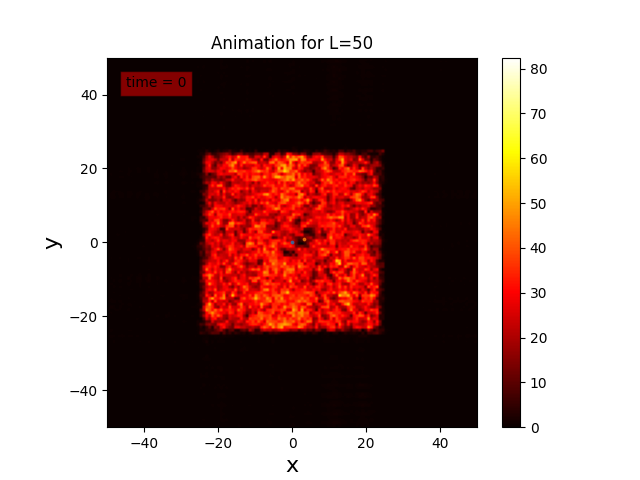

In [10]:
%matplotlib widget
filename = 'test'
path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
time_tracking = np.arange(0, len(g.snaps))*250*g.gpeobj.dt


fig, ax = plt.subplots() 
data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot, origin = 'lower')


# set trajectories: 
#v1_traj = tracker.points[0].getTrajectory()
#v2_traj = tracker.points[1].getTrajectory()

v_scat = [] 
for i in range(len(tracker.points)):
    if tracker.points[i].getStartTime() == 0: 
        vi_traj = tracker.points[i].getTrajectory()
        v_scat.append(plt.scatter(vi_traj[0][0]+0.5-L/2, vi_traj[0][1]+0.5-L/2, alpha = 0.7, s = 3))
     
    
                
#v1 = plt.scatter(v1_traj[0][0]+0.5-L/2,v1_traj[0][1]+0.5-L/2, color = 'blue', alpha = 1, s = 3)
#v2 = plt.scatter(v2_traj[0][0]+0.5-L/2,v2_traj[0][1]+0.5-L/2, color = 'green', alpha = 1, s = 3)

# plt.xlim(-5,5)
# plt.ylim(-5,5)

time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
time_text.set_text('time = 0')

plt.xlabel("x", fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.title(f'Animation for L={g.L}')
fig.colorbar(data)

def animate(i): 
    data.set_data(np.abs(g.snaps[i])**2)
    for i in range(len(tracker.points)): 
        if time_tracking[i] > tracker.points[i].getStartTime(): 
            v_scat[i].set_offsets([vi_traj[i][0]+0.5-L/2,vi_traj[i][1]+0.5-L/2])

    #v1.set_offsets([v1_traj[i][0]+0.5-L/2,v1_traj[i][1]+0.5-L/2])
    #v2.set_offsets([v2_traj[i][0]+0.5-L/2,v2_traj[i][1]+0.5-L/2])
    time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
    #return data, time_text
    return data, time_text, v_scat
anim = animation.FuncAnimation(fig, animate, frames = len(g.snaps), blit = True)
anim.save(path)
plt.show()

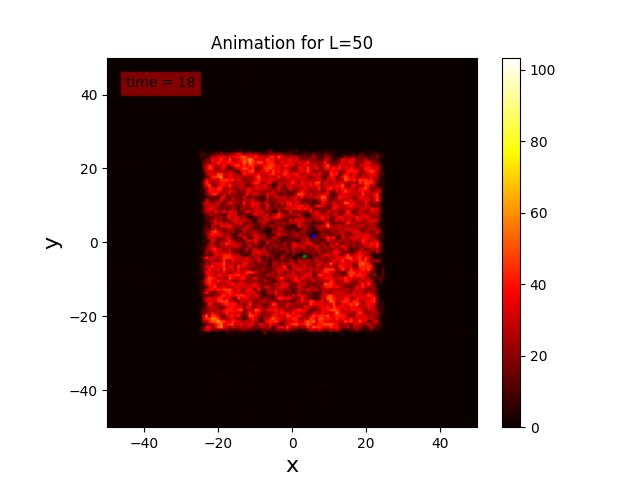

In [8]:
%matplotlib widget
filename = 'test'
path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
time_tracking = np.arange(0, len(g.snaps))*250*g.gpeobj.dt


fig, ax = plt.subplots() 
data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot, origin = 'lower')


# set trajectories: 
v1_traj = tracker.points[0].getTrajectory()
v2_traj = tracker.points[1].getTrajectory()

v1 = plt.scatter(v1_traj[0][0]+0.5-L/2,v1_traj[0][1]+0.5-L/2, color = 'blue', alpha = 1, s = 3)
v2 = plt.scatter(v2_traj[0][0]+0.5-L/2,v2_traj[0][1]+0.5-L/2, color = 'green', alpha = 1, s = 3)

# plt.xlim(-5,5)
# plt.ylim(-5,5)

time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
time_text.set_text('time = 0')

plt.xlabel("x", fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.title(f'Animation for L={g.L}')
fig.colorbar(data)

def animate(i): 
    data.set_data(np.abs(g.snaps[i])**2)
    # fix these: 

    v1.set_offsets([v1_traj[i][0]+0.5-L/2,v1_traj[i][1]+0.5-L/2])
    v2.set_offsets([v2_traj[i][0]+0.5-L/2,v2_traj[i][1]+0.5-L/2])
    time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
    #return data, time_text
    return data
anim = animation.FuncAnimation(fig, animate, frames = len(g.snaps), blit = True)
anim.save(path)
plt.show()